In [12]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

### 1. There are 40 students in an elementary statistics class. From years of experience, the instructor knows that the time needed to grade a randomly chosen paper from an exam is a random variable with an expected value of 6 min and a standard deviation of 6 min. If grading times are independent and the instructor begins grading at 8:00 p.m. and grades continuously, what is the (approximate) probability that she is done grading before the late night shows begin at 11:30 p.m.?

- Let T be the total time taken for all papers
- Let p be the time taken for 1 paper
- By CLT, $T \sim \text{Normal}(\mu = 6 * 40, \sigma^2 = 40 * 6^2)$
    - $E[T] = 240$
    - $Var[T] = 40 * 36 = 1440$
    - $SD[T] = \sqrt{1440} = 37.95$

$$\begin{align}
    P(T < 210) &= P(Z < \frac{210 - 240}{37.95}) \\
    &= P(Z < \frac{210 - 240}{37.95}) \\
    &= P(Z < -0.7905) \\
    &= 0.215
\end{align}$$

In [13]:
times = np.random.normal(loc=240, scale=37.95, size=100_000)
len(times[times < 210]) / 100_000

0.21429

### 2. In roulette, a bet on a single number has a 1/38 probability of success and pays 35-to-1. Consider betting on a single number on each of n spins of a roulette wheel. Let $\bar{X_n}$ be your average net winnings per bet.

- Let $X_i$ be a random variable representing the winning for a single bet
    - There are 2 possible outcomes; (i) $\frac{37}{38}$ change of $-1$, and (ii) $\frac{1}{38}$ of $35$
    - $E[X_i] = \frac{37}{38} * -1 + \frac{1}{38} * 35 = -0.0526$
    - $$\begin{align}
        Var[X_i] &= \frac{37}{38} * (-1 - (-0.0526))^2 + \frac{1}{38} * (35 - (-0.0526))^2 \\
        &= \frac{37}{38} * 0.8976 + \frac{1}{38} * 1228.68 \\
        &= 0.8740 + 32.33 \\
        &= 33.204
        \end{align}$$
    - $SD[X_i] = \sqrt{33.204} = 5.76$

In [158]:
def get_winnings_per_bet(bet_count: int):
    count_wins = np.random.binomial(n=bet_count, p=1/38, size=1_000_000)
    winnings_per_bet = (((bet_count - count_wins) * -1) + (count_wins * 35))/bet_count
    #print(np.mean(winnings_per_bet), np.var(winnings_per_bet))
    return winnings_per_bet

#### a. For which of the following values of n is $\bar{X_n}$ close to normally distributed? Do a simulation to find out. (Copy the code below into a Colab and modify.) n = 10/100/1000/10000

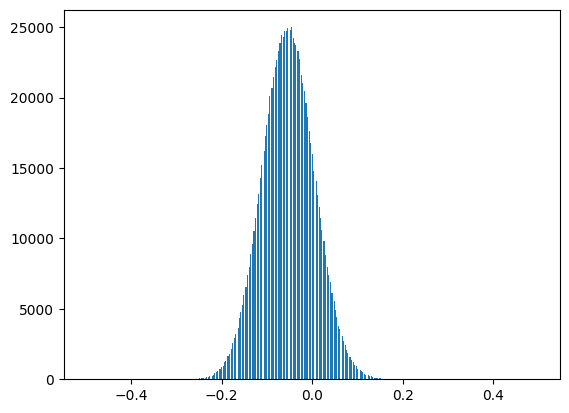

In [157]:
def plot_winning_per_bet_dist(bet_count: int):
    MAP_COUNT_TO_LIMITS = {
        10000: 0.5,
        1000: 1,
        100: 2,
        10: 7.5,
    }
    winnings_per_bet = get_winnings_per_bet(bet_count)
    plt.hist(winnings_per_bet, bins=np.arange(-MAP_COUNT_TO_LIMITS.get(bet_count), MAP_COUNT_TO_LIMITS.get(bet_count), MAP_COUNT_TO_LIMITS.get(bet_count)/200));

# plot_winning_per_bet_dist(10)
# plot_winning_per_bet_dist(100)
# plot_winning_per_bet_dist(1000)
plot_winning_per_bet_dist(10000)

#### b. For each n, calculate the approximate probability that you come out ahead, i.e., $P(\bar{X_n} > 0)$. I encourage you to use a combination of simulation and the Central Limit Theorem (but first double check that it works!). (Hint: We calculated the expected value and variance of this bet in previous lessons.)

- We know that $\bar{X_n} = \frac{\sum X_i}{n}$, where $X_i$ is the winnings from the $i$-th spin
    - We defined above that each spin can have 2 outcomes, -1 or 35
- As such 
    - $$\begin{align} 
        E[\bar{X_n}] &= E[\frac{\sum X_i}{n}] \\ 
        &= \frac{1}{n} E[\sum X_i] \\ 
        &= \frac{1}{n} \cdot n \cdot E[X_i] \\ 
        &= E[X_i] 
        \end{align}$$
    - $$\begin{align} 
        Var[\bar{X_n}] &= Var[\frac{\sum X_i}{n}] \\ 
        &= \frac{1}{n^2} Var[\sum X_i] \\ 
        &= \frac{1}{n^2} \cdot n \cdot Var[X_i] \\ 
        &= \frac{\sigma_{X_i}}{n}
        \end{align}$$
    
- By CLT (assuming the count of $n$ is large), $\bar{X_n} \sim \text{Normal}(\mu = E[X_1], \sigma^2 = \frac{Var[X_1]}{n})$
    - $E[\bar{X_n}] = -0.0526$ for all values of n (10,100,1000,10000)
    - However, variance value differs depending on sample size
        - $$\begin{align}
            Var[\bar{X_{10}}] &= \frac{33.204}{10} = 3.32 \\
            Var[\bar{X_{100}}] &= \frac{33.204}{100} = 0.332 \\
            Var[\bar{X_{1000}}] &= \frac{33.204}{1000} = 0.0332 \\
            Var[\bar{X_{10000}}] &= \frac{33.204}{10000} = 0.00332 \\
            \end{align}$$

- $$\begin{align}
    P(\bar{X_n} > 0) &= P(Z > \frac{0 - -0.0526}{\sigma_n})
    \end{align}$$

- We compute the probabilities for each value of $n$ in [10,100,1000,10000]

In [160]:
p_x10_gt_0 = 1 - scipy.stats.norm.cdf(0.0526 / np.sqrt(3.32))
p_x100_gt_0 = 1 - scipy.stats.norm.cdf(0.0526 / np.sqrt(0.332))
p_x1000_gt_0 = 1 - scipy.stats.norm.cdf(0.0526 / np.sqrt(0.0332))
p_x10000_gt_0 = 1 - scipy.stats.norm.cdf(0.0526 / np.sqrt(0.00332))
print(p_x10_gt_0, p_x100_gt_0, p_x1000_gt_0, p_x10000_gt_0)

0.48848493348981026 0.4636316250377528 0.38641313309786596 0.1806511647142881


- Compare these probabilities with simulations

In [166]:
def proportion_greater_than_0(bet_count: int):
    winnings = get_winnings_per_bet(bet_count)
    return len(winnings[winnings > 0]) / len(winnings)

psim_x10_gt_0 = proportion_greater_than_0(10)
psim_x100_gt_0 = proportion_greater_than_0(100)
psim_x1000_gt_0 = proportion_greater_than_0(1000)
psim_x10000_gt_0 = proportion_greater_than_0(10000)

print(psim_x10_gt_0, psim_x100_gt_0, psim_x1000_gt_0, psim_x10000_gt_0)

0.234156 0.491064 0.39526 0.184436


- The normal approximation works pretty well for n > 100, but it sucks when n=10

#### c. The casino wants to determine how many bets on a single number are needed before they have (at least) a 99% probability of making a profit. (Remember, the casino profits if you lose: $\bar{X_n} < 0$.) Determine the minimum number of bets, keeping in mind that n must be an integer.

- The question here is asking for the value of $n$ such that $P(\bar{X_n} < 0) > 0.99$

$$\begin{align}
    P(\bar{X_n} < 0) > 0.99 &= P(Z < \frac{0.0526}{\frac{\sigma}{\sqrt{n}}}) > 0.99 \\
    &= P(Z < \frac{0.0526}{\frac{\sigma}{\sqrt{n}}}) > 0.99 
    \end{align}$$

- CDF of standard normal variable is 0.99 when Z = 2.33

$$\begin{align}
    \frac{0.0526}{\frac{\sigma}{\sqrt{n}}} &= 2.33 \\
    \frac{\sigma}{\sqrt{n}} &= 0.0226 \\
    \frac{33.204}{\sqrt{n}} &= 0.0226 \\
    \frac{33.204}{0.0226} &= \sqrt{n} \\
    \frac{33.204}{0.0226} &= \sqrt{n} \\
    \sqrt{n} &= 1469.20 \\
    n &= 2158559.04142846 \\
    n &= 2158560 & \text{Round up}
    \end{align}$$

### 3. In San Luis Obispo, radioactive particles reach a Geiger counter according to a Poisson process at a rate of $\lambda = 0.8$ particles per second. What is the probability that the 100th particle is detected between 90 and 120 seconds? Calculate this probability in two ways:

#### a. Argue that the time the 100th particle is detected approximately follows a normal distribution. Use the normal approximation to calculate an approximate probability.

- Since particles arrive at ~0.8 particles per second, it takes $\frac{1}{0.8} = 1.25$ seconds for each particle to arrive

- Let $T$ be the time that the 100th particle arrives, and $X_i$ be the interarrival times of the particles. Hence $T = X_1 + X_2 + ... X_{100}$

- Each $X_i$ follows an exponential distribution with parameter $\lambda = 0.8$
    - $E[X_i] = \frac{1}{0.8} = 1.25$
    - $Var[X_i] = \frac{1}{0.8^2} = 1.56$

- By CLT, $T \sim \text{Normal}(\mu = 100 * 1.25 = 125, \sigma = \sqrt{100 * 1.56} = 12.49)$

$$\begin{align}
    P(90 < T < 120) &= P(T < 120) - P(T < 90) \\
    &= P(Z < \frac{120 - 125}{12.49}) - P(Z < \frac{90 - 125}{12.49}) \\
    &= P(Z < -0.400) - P(Z < -2.802) \\
    &= 0.345 - 0.00254 \\
    &= 0.342
\end{align}$$

In [18]:
1/(0.8**2)
np.sqrt(156)
(90 -125) / 12.49
scipy.stats.norm.cdf(-2.802)
0.345 - 0.00254

0.34246

#### b. We derived the exact p.d.f. of the r-th arrival time in Example 45.2. Integrate this p.d.f. to get the exact probability.

- From example 45.2

$$\begin{align}
    f_{S_r}(t) &= \frac{\lambda^r}{(r-1)!} \cdot e^{-\lambda t} \cdot t^{r-1} 
\end{align}$$

- Applying to this context

$$\begin{align}
    \int_{90}^{120} \frac{0.8^{100}}{(100-1)!} \cdot e^{-0.8 t} \cdot t^{100-1} dt
    &= 0.35391 & \text{from wolfram alpha}
\end{align}$$

#### c. How good was the normal approximation?

- Excellent tbh

### 4. A randomly selected apple from the Cal Poly Orchard weighs 4.9 oz. on average, with a standard deviation of 0.3 oz. However, the distribution of the weights of apples is unknown.

#### a. With the information given, is it possible to determine the probability that a randomly selected apple weighs more than 5.0 oz? If so, calculate it.

- No

#### b. The apples are packed into crates of 60 apples each. The apples are randomly and independently selected from the Cal Poly Orchard. With the information given, is it possible to determine the probability that the total weight of the apples in a crate exceeds 300 oz? If so, calculate it.

- Let X be weight of 60 apples
- $E[X] = 60 * 4.9 = 294$
- $Var[X] = 60 * 0.3^2 = 5.34$ 
- $SD[X] = 2.32$ 

- $$\begin{align}
    P(X > 300) &= P(Z > \frac{300 - 294}{2.32}) \\
    &= P(Z > 2.586) \\
    &= 1 - P(Z \le 2.586) \\
    &= 1 - 0.9951 \\
    &= 0.00485
    \end{align}$$

In [19]:
weights = np.random.normal(loc=294, scale=2.32, size=100_000)
len(weights[weights > 300]) / 100_000

0.00492